In [1]:
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iris Dataset

In [2]:
data = datasets.load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 1.0


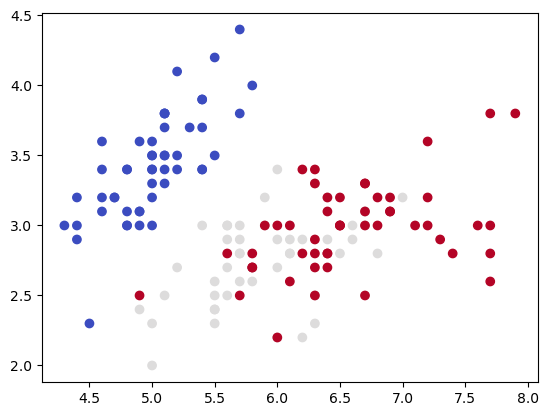

In [3]:
X_plot = X[:,:2]

plt.scatter(X_plot[:,0], X_plot[:,1], c=y, cmap='coolwarm')
plt.show()

# Breast Cancer Wisconsin

In [4]:
data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 0.956140350877193


# Wine Quality Dataset

In [6]:
red = pd.read_csv('datasets/winequality-red.csv', sep=';')
white = pd.read_csv('datasets/winequality-white.csv', sep=';')

red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Classification Problem

wine quality can be approached from both classification and regression problem. For the classification approach, we are going to make it into binary classification problem by changing quality > 6 as 1 and quality < 7 as 0.

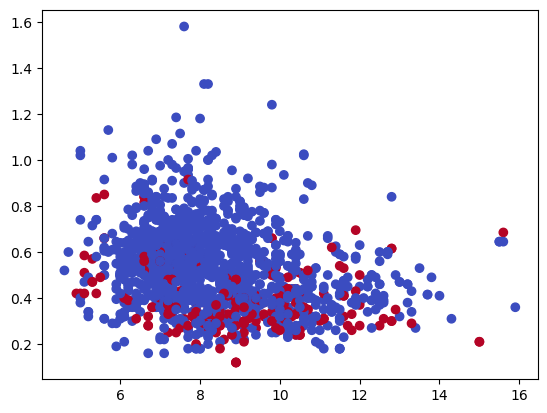

In [20]:
X = red.drop('quality', axis=1)
y = (red['quality']>6).astype(int)

X_plot = X.iloc[:, :2]

plt.scatter(X_plot.iloc[:,0], X_plot.iloc[:,1], c=y, cmap='coolwarm')
plt.show()

We can clearly see that the data is very overlapping and not linearly separable. However, if all the 13 features get mapped together, it might have a linear boundaries. So we still going to use linear kernel before the others.

#### Linear Kernel

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 0.9


#### RBF kernel

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 0.9


#### Poly Kernel

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='poly')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 0.903125


### Regression

even though the target number is a discrete number of 3-9 and not continuous, this problem is can still be considered as a regression problem because the target actually have a rank, or higher number means higher quality, and it is not just a categorical number. It represent a continuous ordered rating scale, even though they are stored as integers.

In [26]:
data = pd.concat([red, white])
X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(kernel='linear')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(f"R2, {r2_score(y_test, y_pred):2f}")
print('MSE', mean_squared_error(y_test, y_pred))

R2, 0.276017
MSE 0.5266528753605247


even so, the performance is not as good as the classification approach